<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/Evaluation_UFJF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
print (sys.version, get_ipython())
%matplotlib inline
def load_from_gspreadsheet(key, sheet_name):
    # google spredsheet TO url 
    # url = "https://docs.google.com/spreadsheet/ccc?key="+key+"&output=csv&sheet={Sheet2}"
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))
    print(url)
    return url

key="1S54P4H2w551PGGT2K0hhcpHvF8L7obwUObfTgRcnjt0"
sheet_name = 'Respostas Válidas'
sheet_name = 'Form Responses 1'
df = pd.read_csv(load_from_gspreadsheet(key, sheet_name), encoding='utf-8')
corsi = set(df['Choose your course:'])
#

3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0] <google.colab._shell.Shell object at 0x7f337713b350>
https://docs.google.com/spreadsheets/d/1S54P4H2w551PGGT2K0hhcpHvF8L7obwUObfTgRcnjt0/gviz/tq?tqx=out:csv&sheet=Form%20Responses%201&headers=1


In [41]:
dout = pd.DataFrame(columns = ['corso', 'rating'])
for i, corso in enumerate(corsi):
  dfc = df[(df['Choose your course:']==corso)] 
#  print(corso, dfc['What overall rating would you give to the course?'].mean())
  dout = dout.append({'corso':corso.split(' -')[0], 'rating':dfc['What overall rating would you give to the course?'].mean()},
                       ignore_index=True)


In [42]:
dout.corso

0     LLA09
1     SSC01
2     STE06
3     LLA06
4     HEA03
5     HUM04
6     LLA11
7     LLA02
8     HEA06
9     LLA01
10    HEA02
11    STE04
12    STE09
13    HEA01
14    LLA08
15    STE05
16    LLA03
17    HEA05
18    LLA05
19    BIO02
20    SSC04
21    STE07
22    BIO01
23    SSC09
24    LLA10
25    HUM01
26    SSC03
27    STE03
28    HEA04
29    SSC05
30    HUM02
31    SSC07
32    LLA04
33    STE02
34    HUM03
35    STE12
36    SSC08
37    STE11
38    STE08
39    STE10
40    LLA07
41    SSC02
42    STE01
Name: corso, dtype: object

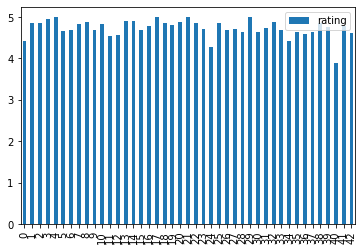

In [58]:
dout.plot(kind='bar')

plt.show()

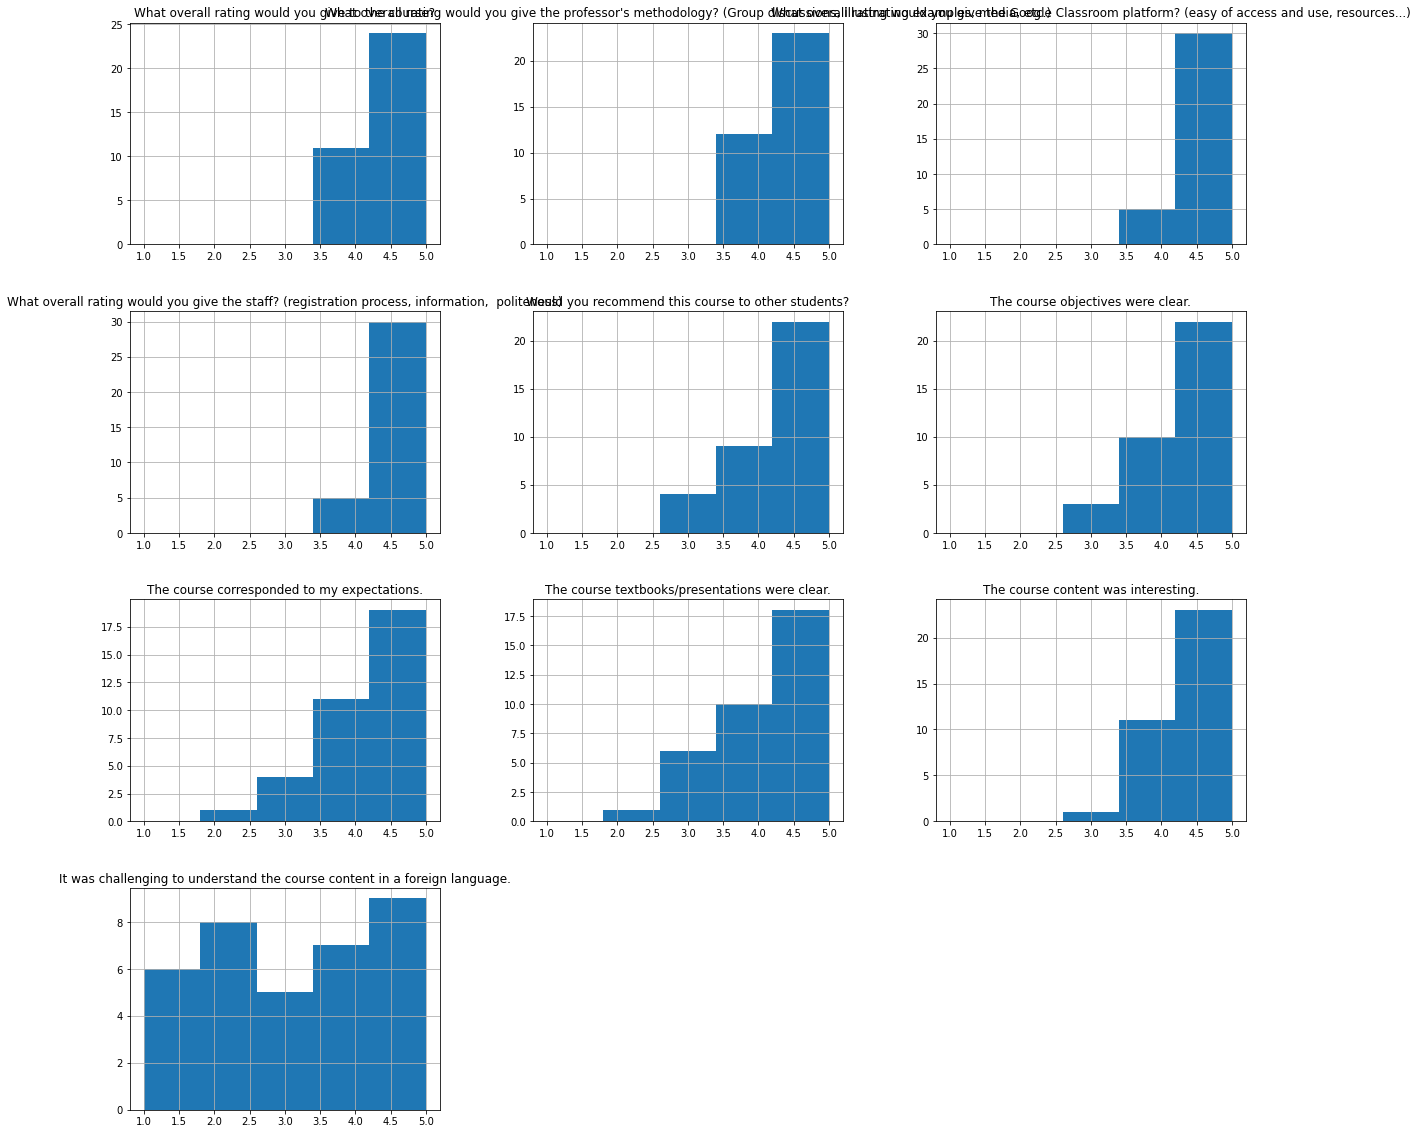

,What overall rating would you give to the course?,"What overall rating would you give the professor's methodology? (Group discussions, illustrating examples, media, etc.)","What overall rating would you give the Google Classroom platform? (easy of access and use, resources...)","What overall rating would you give the staff? (registration process, information, politeness)",Would you recommend this course to other students?,The course objectives were clear.,The course corresponded to my expectations.,The course textbooks/presentations were clear.,The course content was interesting.,It was challenging to understand the course content in a foreign language.
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4.685714,4.657143,4.857143,4.857143,4.514286,4.542857,4.371429,4.285714,4.628571,3.142857
std,0.471008,0.481594,0.355036,0.355036,0.701739,0.657216,0.807528,0.859939,0.546955,1.478132
min,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000
25%,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
df = df[(df['Choose your course:']=='STE05 - Introduction to astro particle physics')] 
df.hist(bins=5, figsize=(20,20), range=(1,5))
plt.show()
df.describe()

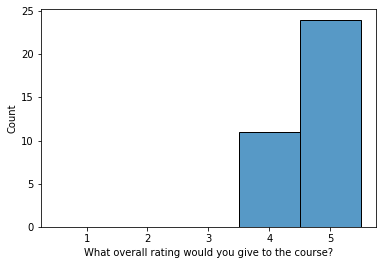

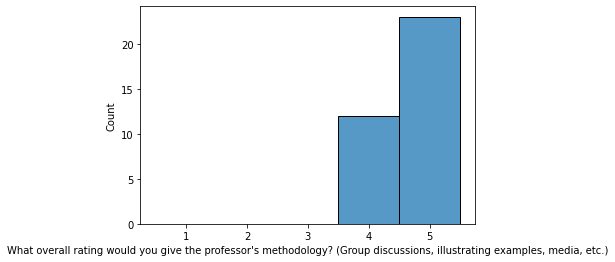

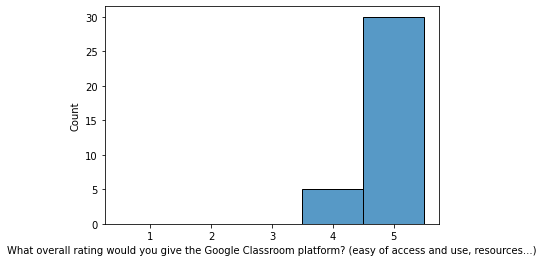

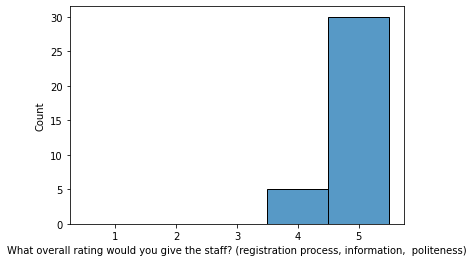

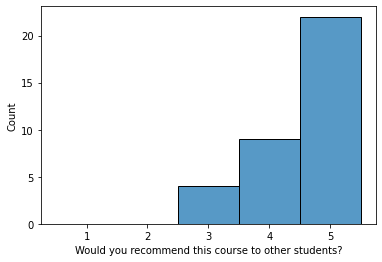

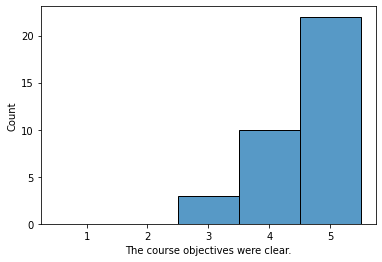

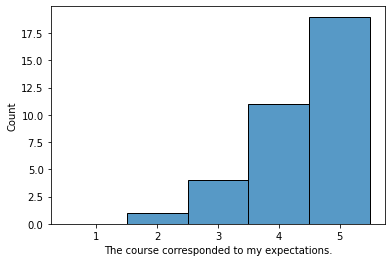

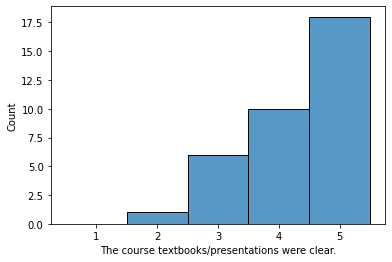

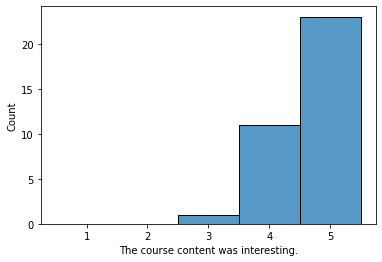

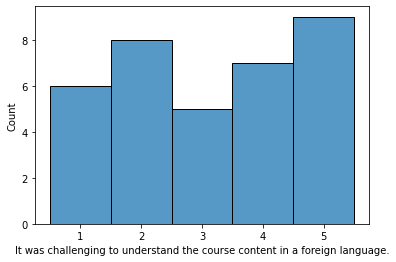

In [ ]:
#plt.figure()
#sns.histplot(df, kde=True, bins=5, binrange=(1,5), discrete=True) 
for i, column in enumerate(df.columns):

  if i>4 and i<len(df.columns)-1:
    #print (i,column)
    plt.figure()
    sns.histplot(df[column], bins=5, binrange=(1,5), discrete=True)
    plt.show()